In [1]:
import pandas as pd
titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')
titanic 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Question 1 [20 points]
Only plot required

Create a pie chart which shows the proportion of male/female passengers.

Text(0.5, 1.0, 'Proportion of male and female passengers displayed in a Pie Chart')

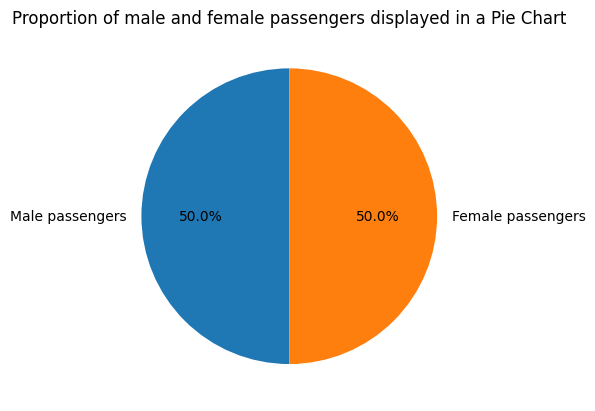

In [2]:
import matplotlib.pyplot as plt

labels = ['Male passengers', 'Female passengers']
sizes = [(titanic['sex']=='male').count(), (titanic['sex']=='female').count()]

fig, ax = plt.subplots()
ax.pie(sizes, 
       labels=labels,
      startangle=90,
      autopct='%1.1f%%')

plt.title('Proportion of male and female passengers displayed in a Pie Chart')


# Question 2 [20 points]
Only plot required

Create a pie chart which shows the proportion of passengers in each class (1, 2, 3).

Text(0.5, 1.0, 'Proportion of passengers in each class displayed in a Pie Chart')

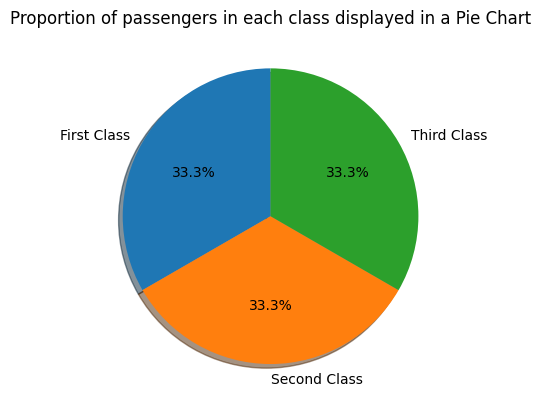

In [3]:
import matplotlib.pyplot as plt

labels = ['First Class', 'Second Class', 'Third Class']
sizes = [(titanic['class']=='First').count(), (titanic['class']=='Second').count(), (titanic['class']=='Third').count()]
colours = ['c','g','y']

fig, ax = plt.subplots()
ax.pie(sizes, 
       labels=labels,
       startangle=90,
       autopct='%1.1f%%',
       shadow= True,)

plt.title('Proportion of passengers in each class displayed in a Pie Chart')

# Question 3 [20 points]
Plot and interpretation required

Explain the relationship between age and fare using a visualisation.


In [20]:
# import matplotlib.pyplot as plt

# # Extract the 'age' and 'fare' columns from the 'titanic' dataset
# x = titanic['age']
# y = titanic['fare']

# plt.plot(x, y, label='Fare', linewidth=2)

# plt.title('Line chart to show relationship between age and fare')
# plt.ylabel('Fare (£)')
# plt.xlabel('Age (Years)')

# plt.legend()
# plt.show()

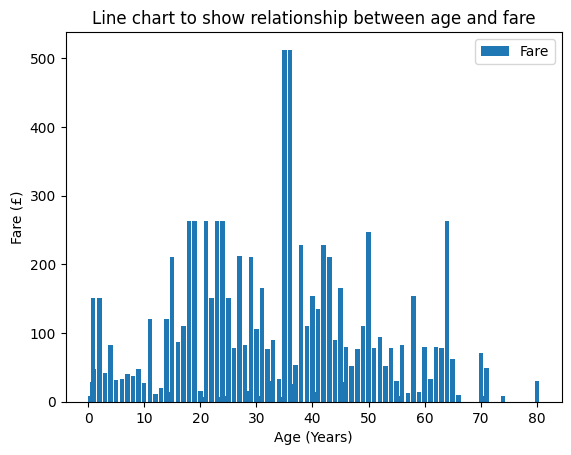

In [7]:
import matplotlib.pyplot as plt

# Extract the 'age' and 'fare' columns from the 'titanic' dataset
x = titanic['age']
y = titanic['fare']

plt.bar(x, y, label='Fare', linewidth=2)

plt.title('Line chart to show relationship between age and fare')
plt.ylabel('Fare (£)')
plt.xlabel('Age (Years)')

plt.legend()
plt.show()

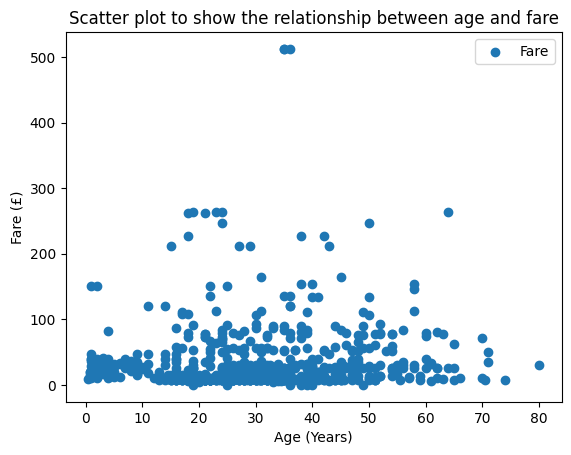

In [95]:
import matplotlib.pyplot as plt

x = titanic['age']
y = titanic['fare']

plt.scatter(x, y, label='Fare')

plt.title('Scatter plot to show the relationship between age and fare')
plt.ylabel('Fare (£)')
plt.xlabel('Age (Years)')

plt.legend()
plt.show()

I have included all the code for the various visualisations I experimented with to show the relationship between fare and age. I did not find the line chart useful, as there were too many data points. The bar chart shows that there is not really a significant relationship between fare and age. For those aged 35, the price is significantly higher - this outlier is clear in the scatter plot, as the dots above 35 are so separate from the main mass of data points along the lower edge of the y axis. 

# Question 4 [40 points]
Plot and interpretation required

What is the survival ratio by age, sex, and class.

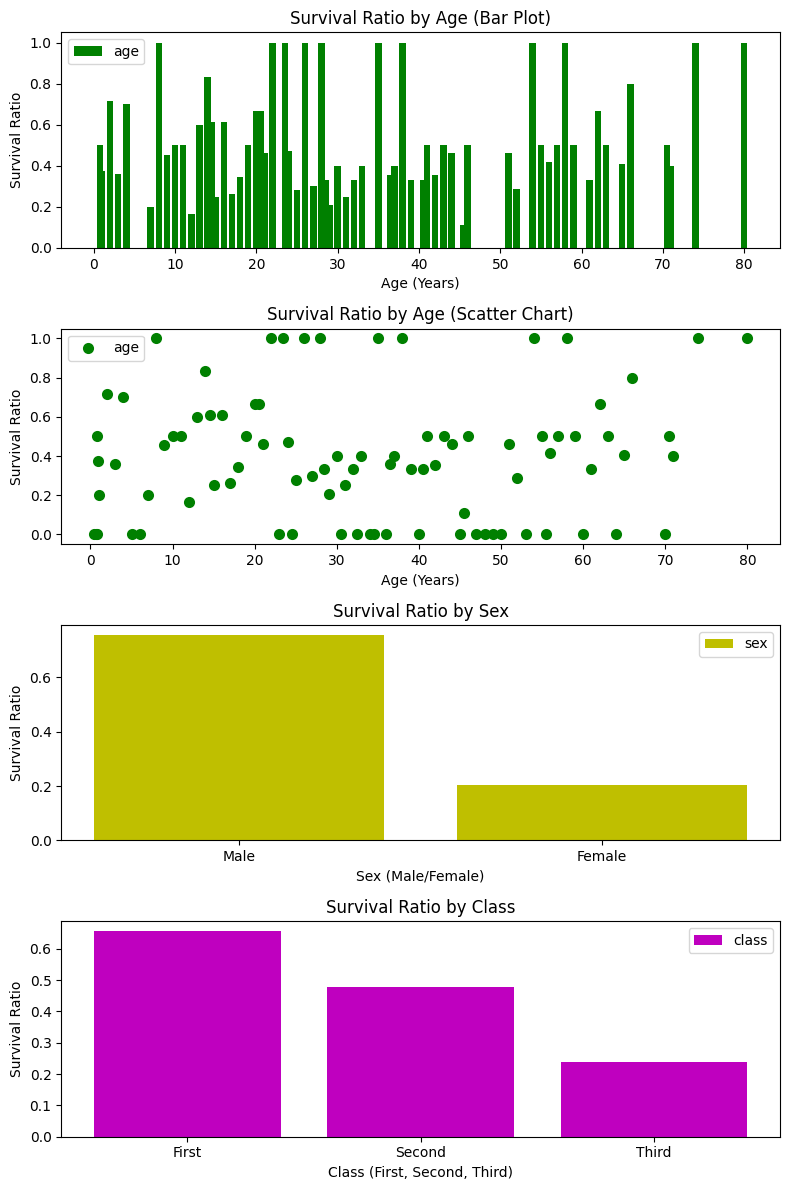

In [97]:
import matplotlib.pyplot as plt

survival_ratio_age = titanic.groupby(['age'])['survived'].mean().tolist()
survival_ratio_sex = titanic.groupby(['sex'])['survived'].mean().tolist()
survival_ratio_class = titanic.groupby(['class'])['survived'].mean().tolist()

x_age = titanic['age'].unique().tolist() 
x_sex = ['Male', 'Female']  
x_class = ['First', 'Second', 'Third'] 

fig, (ax1, ax4, ax2, ax3) = plt.subplots(4, 1, figsize=(8, 12))

ax1.bar(x_age, survival_ratio_age, label='age', linewidth=2, color='g')
ax1.set_title('Survival Ratio by Age (Bar Plot)')
ax1.set_xlabel('Age (Years)')
ax1.set_ylabel('Survival Ratio')
ax1.legend()

ax4.scatter(x_age, survival_ratio_age, label='age', linewidth=2, color='g')
ax4.set_title('Survival Ratio by Age (Scatter Chart)')
ax4.set_xlabel('Age (Years)')
ax4.set_ylabel('Survival Ratio')
ax4.legend()

ax2.bar(x_sex, survival_ratio_sex, label='sex', linewidth=2, color='y')
ax2.set_title('Survival Ratio by Sex')
ax2.set_xlabel('Sex (Male/Female)')
ax2.set_ylabel('Survival Ratio')
ax2.legend()

ax3.bar(x_class, survival_ratio_class, label='class', linewidth=2, color='m')
ax3.set_title('Survival Ratio by Class')
ax3.set_xlabel('Class (First, Second, Third)')
ax3.set_ylabel('Survival Ratio')
ax3.legend()

fig.tight_layout()
plt.show()



From these visualisations, two factors emerge as determining survival. Men were far more likely to survive than woman, as shown by the significantly higher bar in the bar chart. This is interesting, as, historically, there was a large emphasis of getting 'women and children' out of dangerous situations (I am basing this on the film Titanic, so it might not be fully accurate). In addition, as the people on the boat went down in class, the survival ratio was distinctly less i.e. you were more likely to survive if you were in first class than second, and more likely to survive if you were in second class than third. There does not appear to be any link between age and survival ratio; I included both a bar plot and scatter chart to highlight the lack of pattern in either the heights of the bars or spacing of the dots (clearly no linear relationship). 